# Stroke Prediction

According to the center for disease control and prevention in 2020, 1 over 6 deadths from cardiovascular disease was due to stroke, 1 every 40 seconds, someone in the United States has a stroke,  Every 3.5 minutes, someone dies of stroke, 
Every year, more than 795,000 people in the United States have a stroke and Stroke is a leading cause of serious long-term disability. Stroke is not only a major health concern in the United state but the adverse impact of stroke is experienced world wide. The world stroke organization (WSO) state that stoke remains the second-leading cause of death and the third leading cause of deadth and disability combined in the wolrd.

In this project we are going to build supervise machine learning models for stroke prediction. 
The dataset contains 11 attribute plus one target variable, the target variable is stroke.

# Dataset description

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not


# Importing packages 

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats
sns.set()
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings("ignore")

In [50]:

# Read the csv file
df = pd.read_csv('Stroke_data.csv')

# Exploratory Data Analysis (EDA)

Our data contains 43400 rows and 12 columns

In [51]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
5,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,NaN,0
6,52800,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
7,41413,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
8,15266,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0
9,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0


We are goind to check the statistics of our dataset using data.describe(), data.info() will help us to see if our data as categorical value so later we can convert the categorical value to numerical value using encoding method. It is also important to check if the dataset containt any missing value so we can fill the missing value for a better data analysis. We can not complete this exploratory data analysis whithout checking the nature of our target variable in to to see if our data is balance or imbalanced.

## Data Statistics

In [52]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


From data.info() we can clearly see that we gender, ever_married, work_type, Residence_type, smoking_status 
are categorical variable that we need to convert to numerical variable for a better analysis.

## Handling missing value

The question here is how to hanlde the missing values

First let check the percentage of missing value for each attributes, that help us determine which method to use when handling missing value. For example if the percentage of missing value is insificante we can decide to drop rows that contains the missing value than to replace it.

In [54]:
# summarize the number of rows with missing values for each column
for i in df.columns:
 # count number of rows with missing values
 n_miss = df[[i]].isnull().sum()
 perc = n_miss / df.shape[0] * 100
 print('> %s, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> id, Missing: 0 (0.0%)
> gender, Missing: 0 (0.0%)
> age, Missing: 0 (0.0%)
> hypertension, Missing: 0 (0.0%)
> heart_disease, Missing: 0 (0.0%)
> ever_married, Missing: 0 (0.0%)
> work_type, Missing: 0 (0.0%)
> Residence_type, Missing: 0 (0.0%)
> avg_glucose_level, Missing: 0 (0.0%)
> bmi, Missing: 1462 (3.4%)
> smoking_status, Missing: 13292 (30.6%)
> stroke, Missing: 0 (0.0%)


From the above output was can see that 30.6% of  smoking_status columns as missing values and 3.4% of bmi columns
has missing values. The pourcentage of missing value of the smoking_status columns is highly significante that delete
the rows that contantains the missing values will lead the hude data lost. 
Even tough bmi has only 3.4% of missing values, for this project we decide not to drop missing value but instead
to fill them. There is many ways of filling missing values. 

 Our dataset got 5 attributes (gender, ever_married, work_type, Residence_type, smoking_status) that is represented by non numerical values. 
Before to provide encoding tables for the 5 attributes, we need to know the unique value of each of this 5 attributes.
The code from the cell below print the unique values of each of our 5 attributes.

In [55]:
# Select the columns to print unique values for
selected_cols = ['gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status']

# Loop through the selected columns and print unique values for each one
for col in selected_cols:
    unique_vals = df[col].unique()
    print(f"Unique values for {col}: {unique_vals}")

Unique values for gender: ['Male' 'Female' 'Other']
Unique values for ever_married: ['No' 'Yes']
Unique values for Residence_type: ['Rural' 'Urban']
Unique values for work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Unique values for smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']


Without printing the unique values for gender, it could be hard for us to know that gender as Other as value. The code below shows which row contains the value Other on the attribute gender and how many rows contains the value Other.

## Data Visualisation

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

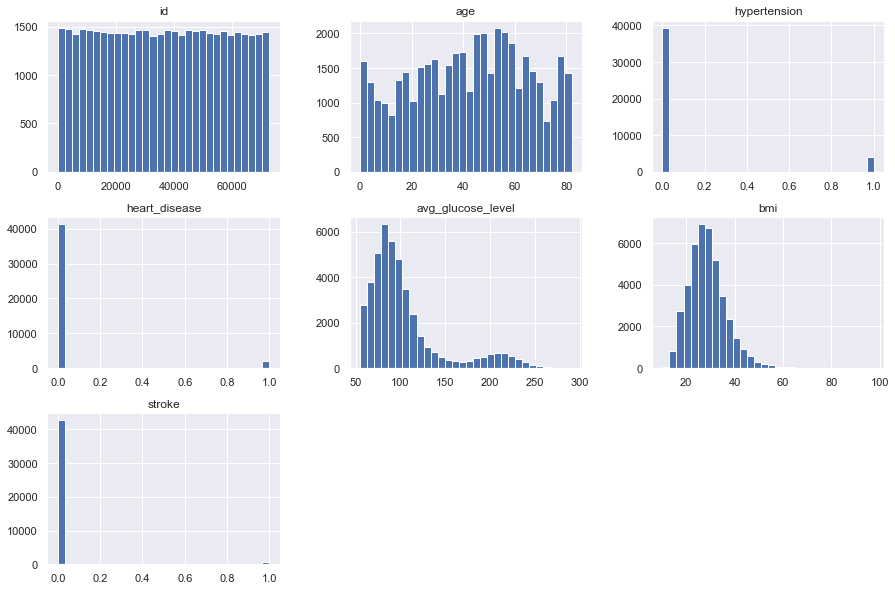

In [56]:
df.hist(bins=30, figsize=(15,10))

<AxesSubplot:>

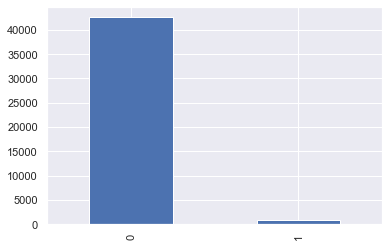

In [57]:
df['stroke'].value_counts().plot.bar()

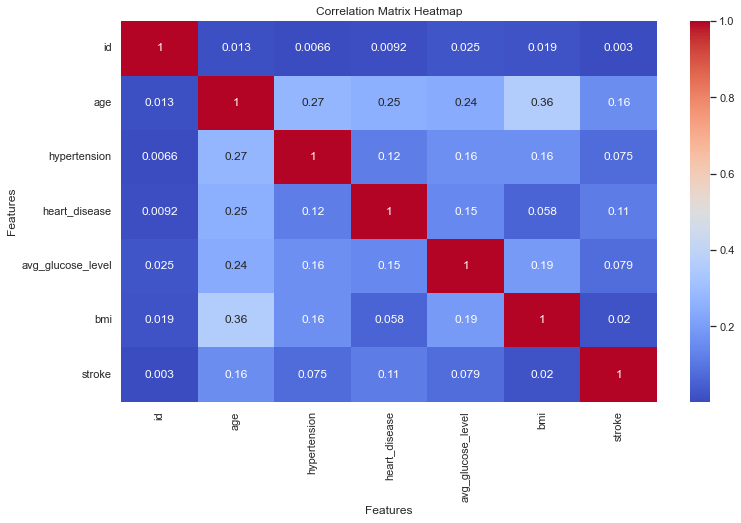

In [58]:
plt.figure(figsize=(12,7))
# Calculate correlation matrix
corr_matrix = df.corr()

# Create heatmap with correlation values
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set plot title and axis labels
plt.title("Correlation Matrix Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

# Show plot
plt.show()

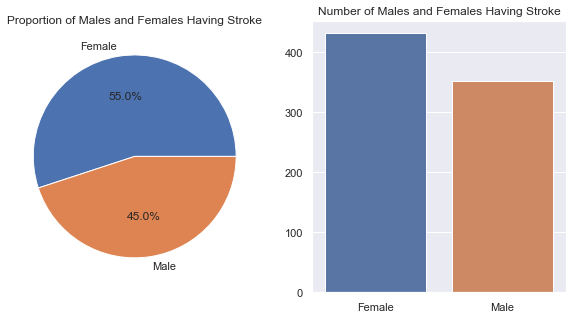

In [59]:
## Nummber of male vs number of female having stroke


# Count number of males and females having stroke
gender_stroke_count = df[df["stroke"] == 1]["gender"].value_counts()

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Create pie chart on the first subplot
ax1.pie(gender_stroke_count, labels=gender_stroke_count.index, autopct="%1.1f%%")
ax1.set_title("Proportion of Males and Females Having Stroke")

# Create bar plot on the second subplot
sns.barplot(x=gender_stroke_count.index, y=gender_stroke_count.values, ax=ax2)
ax2.set_title("Number of Males and Females Having Stroke")

# Show plot
plt.show()

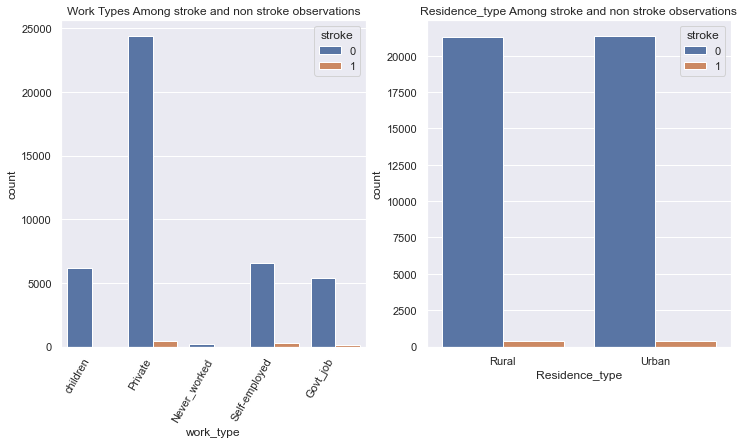

In [60]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x= 'work_type', hue= 'stroke', data=df, ax=ax1)
_ = ax1.set_xticklabels(labels = df['work_type'].unique(),rotation=60, ha='right')
ax1.set_title('Work Types Among stroke and non stroke observations')

sns.countplot(x= 'Residence_type', hue= 'stroke', data=df, ax = ax2)
_ = ax2.set_title('Residence_type Among stroke and non stroke observations')

plt.show()

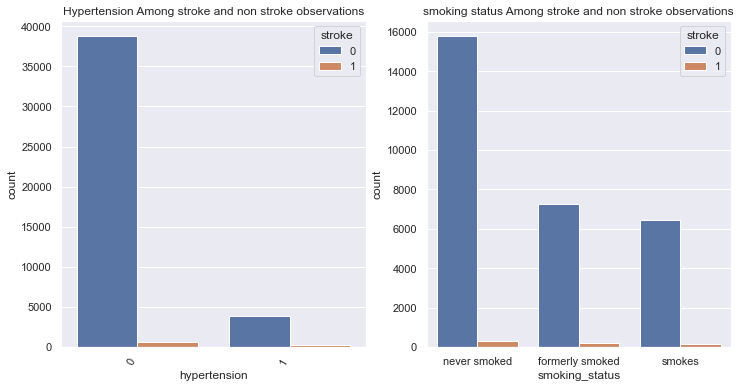

In [61]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x= 'hypertension', hue= 'stroke', data=df, ax=ax1)
_ = ax1.set_xticklabels(labels = df['hypertension'].unique(),rotation=60, ha='right')
ax1.set_title('Hypertension Among stroke and non stroke observations')

sns.countplot(x= 'smoking_status', hue= 'stroke', data=df, ax = ax2)
_ = ax2.set_title('smoking status Among stroke and non stroke observations')

plt.show()

In [62]:
#drop id column 
df = df.drop(['id'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [63]:
df.isna().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

## Ordinal encoder

ordinal encoder convert categorical data to numerical data

In [64]:
###encode
data_str=df
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
encoder.fit(data_str[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
encoded_data = encoder.transform(data_str[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])
data_str[['gender_encoded', 'ever_married_encoded', 'work_type_encoded', 'Residence_type_encoded', 'smoking_status_encoded']] = encoded_data
data_str

data_str[['gender','ever_married', 'Residence_type', 'work_type', 'smoking_status']]=data_str[['gender_encoded', 'ever_married_encoded', 'Residence_type_encoded', 'work_type_encoded', 'smoking_status_encoded']]

data_str = data_str.drop(['gender_encoded', 'ever_married_encoded', 'Residence_type_encoded', 'work_type_encoded', 'smoking_status_encoded'], axis=1)

data_str
data_str.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  float64
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  float64
 5   work_type          43400 non-null  float64
 6   Residence_type     43400 non-null  float64
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  float64
 10  stroke             43400 non-null  int64  
dtypes: float64(8), int64(3)
memory usage: 3.6 MB


In [65]:
#first import KNN imputer
from sklearn.impute import KNNImputer

In [66]:
### Fill missing value using KNN
import pandas as pd
from sklearn.impute import KNNImputer

df=data_str
# select columns to impute
impute_columns = ['bmi','smoking_status']
impute_df = df[impute_columns]

# create KNN imputer and fit to data
imputer = KNNImputer(n_neighbors=5)
imputer.fit(impute_df)

# impute missing values
imputed_data = imputer.transform(impute_df)

# replace original dataframe with imputed values
df[impute_columns] = imputed_data

In [67]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Outlier detection 

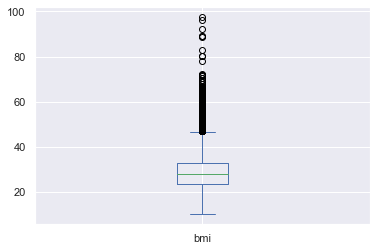

In [68]:
df['bmi'].plot(kind='box')
plt.show()

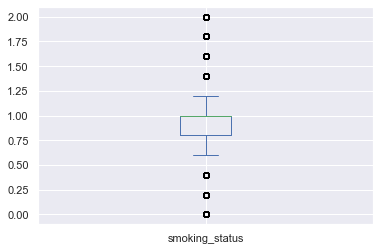

In [69]:
df['smoking_status'].plot(kind='box')
plt.show()

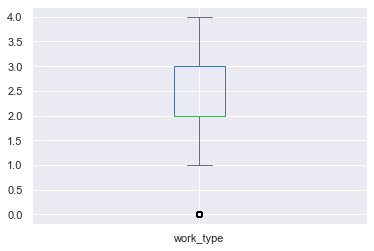

In [70]:
df['work_type'].plot(kind='box')
plt.show()

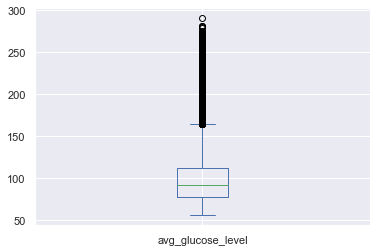

In [71]:
df['avg_glucose_level'].plot(kind='box')
plt.show()

In [72]:

def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(df[col_name], 25)
    third_quartile = np.percentile(df[col_name], 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [73]:
numerics= df.select_dtypes(include='float64')
for column in numerics.columns:
    if outlier_function(numerics, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df, column)[2], column))

There are 5440 outliers in work_type
There are 4978 outliers in avg_glucose_level
There are 1001 outliers in bmi
There are 16384 outliers in smoking_status


In [74]:
df.shape

(43400, 11)

In [75]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.408894,42.217894,0.093571,0.047512,0.643733,2.185438,0.501290,104.482750,28.655275,0.972383,0.018041
std,0.492151,22.519649,0.291235,0.212733,0.478901,1.093158,0.500004,43.111751,7.648132,0.591504,0.133103
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.540000,23.400000,0.800000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.580000,28.100000,1.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.800000,1.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [76]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3.0,0,0,0.0,4.0,0.0,95.12,18.0,1.0,0
1,1.0,58.0,1,0,1.0,2.0,1.0,87.96,39.2,1.0,0
2,0.0,8.0,0,0,0.0,2.0,1.0,110.89,17.6,0.8,0
3,0.0,70.0,0,0,1.0,2.0,0.0,69.04,35.9,0.0,0
4,1.0,14.0,0,0,0.0,1.0,0.0,161.28,19.1,0.8,0


## SMOTE to balance data

Before applying SMOTE to balance our data let confirm that our data is umbalance

In [77]:
### checking if our data is balance

stroke_percentages = df['stroke'].value_counts(normalize=True) * 100

# Print the percentages
print(f"Percentage of stroke=0: {stroke_percentages[0]:.2f}%")
print(f"Percentage of stroke=1: {stroke_percentages[1]:.2f}%")

Percentage of stroke=0: 98.20%
Percentage of stroke=1: 1.80%


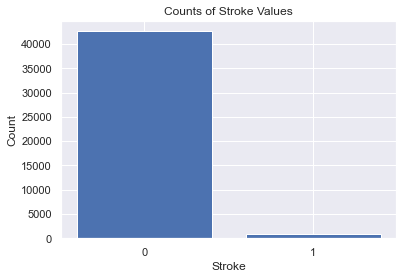

In [78]:
stroke_counts = df['stroke'].value_counts()

# Create a bar plot
plt.bar(stroke_counts.index, stroke_counts.values)

# Add labels and title
plt.title('Counts of Stroke Values')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
target = df['stroke']
predictors = df.drop('stroke', axis=1)
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size=0.2,
                                                    random_state= 42, stratify = target.values)




To balance our data we fisrt apply SMOTE (Synthetic Minority Oversampling Technique) to our data. SMOTE is an oversampling technique where syntehtic sample are generated for monirity class. For this project the minority class people with stroke and the majority is people with no strong. After SMOTE we are going to apply the undersampling method to reduce the majority class which is people without stroke.




In [80]:
# SMOTE method for class imbalance, 
X = df.drop('stroke', axis=1)
y= df['stroke']
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy= 0.4, random_state=42)
X_smote,y_smote = oversample.fit_resample(x_train,y_train,)

print('Class distribution before smote sampling:')
print(y.value_counts())
print('Class distribution after smote sampling:')
print(pd.Series(y_smote).value_counts())


Class distribution before smote sampling:
0    42617
1      783
Name: stroke, dtype: int64
Class distribution after smote sampling:
0    34094
1    13637
Name: stroke, dtype: int64


In [81]:
# undersampling 
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss(sampling_strategy = 0.7)
X_unders, y_unders = nearmiss.fit_resample(X_smote, y_smote)

print('Class distribution after smote and before random undersampling:')
print(y_smote.value_counts())
print('Class distribution after random undersampling:')
print(pd.Series(y_unders).value_counts())



Class distribution after smote and before random undersampling:
0    34094
1    13637
Name: stroke, dtype: int64
Class distribution after random undersampling:
0    19481
1    13637
Name: stroke, dtype: int64


In [82]:
stroke_percentages = df['stroke'].value_counts(normalize=True) * 100

# Print the percentages
print(f"Percentage of stroke=0: {stroke_percentages[0]:.2f}%")
print(f"Percentage of stroke=1: {stroke_percentages[1]:.2f}%")

Percentage of stroke=0: 98.20%
Percentage of stroke=1: 1.80%


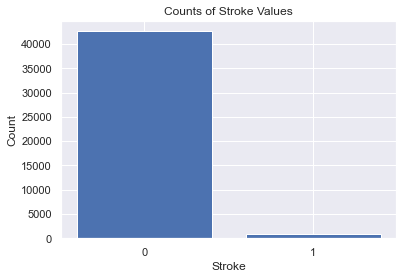

In [83]:
stroke_counts = df['stroke'].value_counts()

# Create a bar plot
plt.bar(stroke_counts.index, stroke_counts.values)

# Add labels and title
plt.title('Counts of Stroke Values')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Show the plot
plt.show()

## Models on umbalance data

In [84]:

from sklearn.metrics import accuracy_score

#ML algoritms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [85]:
# Data before applying sampling method 
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {"LR": LogisticRegression(),
          "SVM": SVC(kernel='linear'),
          'DTC' : DecisionTreeClassifier(),
         "KNN" : KNeighborsClassifier(),
          "NB": GaussianNB(),
          'RFC' : RandomForestClassifier(),
          'ABC' : AdaBoostClassifier(),
          'GBC' : GradientBoostingClassifier(),
          
          }

          
          

for test, clf in models.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
   
    print(confusion_matrix(y_test, y_pred))
  
    model_accuracy = model_accuracy.append({'Model': test, 'Model': test, 'Accuracy': acc, 'precision': precision, 'Recall':recall,'f1_score': f1}, ignore_index=True)

[[8523    0]
 [ 157    0]]
[[8523    0]
 [ 157    0]]
[[8306  217]
 [ 141   16]]
[[8516    7]
 [ 157    0]]
[[7867  656]
 [ 112   45]]
[[8521    2]
 [ 157    0]]
[[8523    0]
 [ 157    0]]
[[8515    8]
 [ 156    1]]


In [86]:
model_accuracy

,Model,Accuracy,Recall,f1_score,precision
0,LR,0.981912,0.000000,0.000000,0.000000
1,SVM,0.981912,0.000000,0.000000,0.000000
2,DTC,0.958756,0.101911,0.082051,0.068670
3,KNN,0.981106,0.000000,0.000000,0.000000
4,NB,0.911521,0.286624,0.104895,0.064194
5,RFC,0.981682,0.000000,0.000000,0.000000
6,ABC,0.981912,0.000000,0.000000,0.000000
7,GBC,0.981106,0.006369,0.012048,0.111111


Before resample the data the accuracy of models is good ranging from 0.91 to 0.98 but the precison, recall and F1 score for stroke is 0. having 0 as precison, recall and F1 score is a bad indicator, it is because the nature of the data. let us run all the model with the balanced data and compare the outcome of the precision, recall and F1 score.





## Model after balancing data

In [87]:
#resampled data train_test_split
resampX_train, resampX_test, resampy_train, resampy_test = train_test_split(X_unders, y_unders, test_size= 0.8,
                                                               random_state=42)

print(resampX_train.shape, resampX_test.shape)
print(resampy_train.shape, resampy_test.shape)

(6623, 10) (26495, 10)
(6623,) (26495,)


In [88]:
# model with balanced data
model_accuracy = pd.DataFrame(columns=['Model','Accuracy'])
models = {"LR": LogisticRegression(),
          "SVM": SVC(kernel='linear'),
         "KNN" : KNeighborsClassifier(),
          'DTC' : DecisionTreeClassifier(),
          "NB": GaussianNB(),
          'RFC' : RandomForestClassifier(),
          'ABC' : AdaBoostClassifier(),
          'GBC' : GradientBoostingClassifier(),
          
          }

for test, clf in models.items():
    clf.fit(resampX_train, resampy_train)
    y_pred = clf.predict(resampX_test)
    acc = accuracy_score(resampy_test,y_pred)
    precision = precision_score(resampy_test, y_pred)
    f1 = f1_score(resampy_test, y_pred)
    recall=recall_score(resampy_test, y_pred)
    train_pred = clf.predict(resampX_train)
    
    print(confusion_matrix(resampy_test,y_pred))
   
    model_accuracy = model_accuracy.append({'Model': test, 'Accuracy': acc, 'precision': precision, 'recall':recall,'f1_score': f1}, ignore_index=True)

[[12293  3383]
 [ 3985  6834]]
[[11788  3888]
 [ 3603  7216]]
[[11413  4263]
 [ 1050  9769]]
[[14434  1242]
 [ 1037  9782]]
[[11259  4417]
 [ 3279  7540]]
[[15483   193]
 [  774 10045]]
[[15381   295]
 [ 1269  9550]]
[[15577    99]
 [ 1114  9705]]


In [89]:
model_accuracy.sort_values('Accuracy', ascending=False)

,Model,Accuracy,f1_score,precision,recall
5,RFC,0.963503,0.954077,0.981149,0.928459
7,GBC,0.954218,0.941182,0.989902,0.897033
6,ABC,0.94097,0.924313,0.970036,0.882706
3,DTC,0.913984,0.895665,0.887337,0.904150
2,KNN,0.799472,0.786206,0.696194,0.902949
0,LR,0.72191,0.649743,0.668885,0.631667
1,SVM,0.717267,0.658304,0.649856,0.666975
4,NB,0.70953,0.662100,0.630593,0.696922


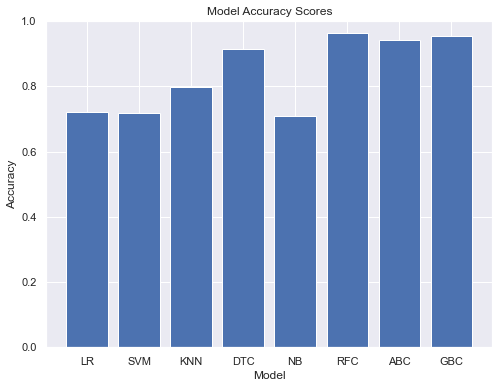

In [90]:
import matplotlib.pyplot as plt

# create a bar plot of model accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(model_accuracy['Model'], model_accuracy['Accuracy'])
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
